## Exploratory data analysis

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

Read in ratings file

In [2]:
ratings = pd.read_csv("ratings_clean.csv",  quoting=csv.QUOTE_NONNUMERIC)

The main info that I need to know for the model is the distribution of ratings for each user (rater) and for each movie.

To start off with I'll examine the distribution of ratings for each user and the number of users with more than 10 and 100 ratings:

13009
1619


,Number of ratings for users (raters)
count,59348.000000
mean,13.553902
std,47.638946
min,1.000000
25%,1.000000
50%,2.000000
75%,8.000000
max,2815.000000


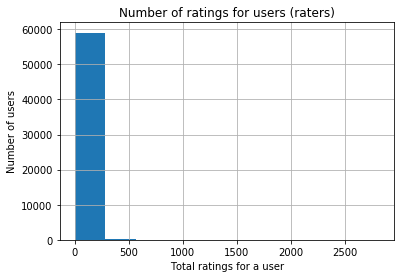

In [3]:
df = ratings.groupby("rater_id")[["rating"]].count()
print(df[df['rating']>=10].size)
print(df[df['rating']>=100].size)
df.columns = ["Number of ratings for users (raters)"]
df.hist()
plt.xlabel("Total ratings for a user")
plt.ylabel("Number of users")
df.describe()


Here we can see the ratings are sparse -- most users have few ratings. However, there are still 13009 users with 10 or more ratings and 1619 users with 100 or more ratings. The average is 13.6 ratings per user, and the median is 2 -- the distribution is extemely right skewed. 

Next, I'll look at the mean rating for each user:

,Mean ratings for users
count,59348.000000
mean,7.902198
std,1.732106
min,0.000000
25%,7.000000
50%,8.000000
75%,9.000000
max,10.000000


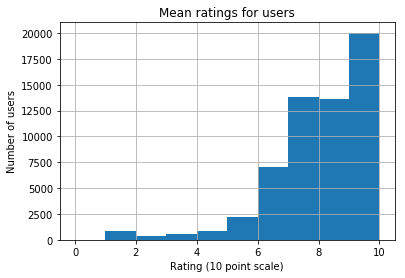

In [4]:
df = ratings.groupby("rater_id")[["rating"]].mean()
df.columns = ["Mean ratings for users"]
df.hist()
plt.xlabel("Rating (10 point scale)")
plt.ylabel("Number of users")
df.describe()

The mean rating is 7.9 and median is 8. Most users tend to rate movies favorably on average.

Next I'll examine the distrubutions for movies, starting with the number of ratings per movie:

,Number of ratings for movies
count,34074.000000
mean,23.607355
std,109.515549
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,3066.000000


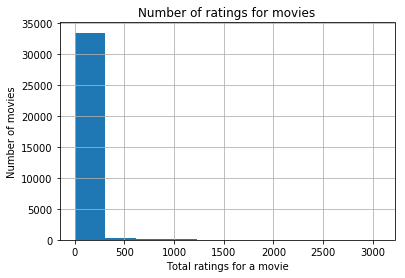

In [5]:
df = ratings.groupby("movie_id")[["rating"]].count()
df.columns = ["Number of ratings for movies"]
df.hist()
plt.xlabel("Total ratings for a movie")
plt.ylabel("Number of movies")
df.describe()

Another extremely right skewed distribution, with a mean of 23.6 and median of 2. Clearly, most movies have a few ratings, and a small minority of movies have more than 1000 reviews.

Now let's look at mean rating per movie:

,Mean ratings for movies
count,34074.000000
mean,6.688983
std,1.827702
min,0.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,10.000000


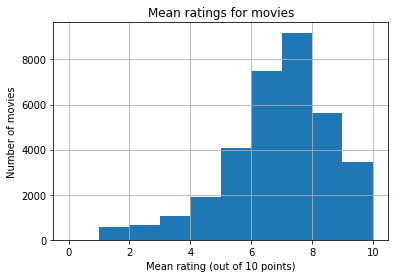

In [6]:
df = ratings.groupby("movie_id")[["rating"]].mean()
df.columns = ["Mean ratings for movies"]
df.hist()
plt.xlabel("Mean rating (out of 10 points)")
plt.ylabel("Number of movies")
df.describe()

The mean and median of 6.7 and 7 are both lower than those for the users. Generally, movies tend to get favorable reviews on averge.